# <center>        **Introduction to Data Science (S1-22_DSECLZG523)-ASSIGNMENT**</center>

## Group No: 121

## Group Member Names:
1. Soumyadipta Maiti (2021SC04237)
2. Dipannita Bandyopadhyay (2021SC04700)
3. Tanvir Ahmad (2021SA04035)
4. Tauheed Ahmad (2021SC04698)

# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

1. The business problem that we are trying to solve is to predict the ratings score of the review, given some independent feaures like product_id, user_id, reviews etc. There might some scenarios where user just write the review and does not provide ratings. Thus, creating a gap in the final analysis to present on customer satisfaction. This notebook is to reduce that gap.

2. Tehe dataset we are using here is e-commerce dataset from Amazon, containing info of users who made a review on a particular product.

3. The dataset has been taken from Kaggle, although it is present in other locations like UCI etc.

4. Multiclass Classifcation under Predictive Analytics is what we are trying to achieve.

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [1]:
##---------Type the code below this line------------------##
import requests
URL = "https://drive.google.com/file/d/1ggu_23hQFQrOqSQCNoQHtJU4U-sUYoBm/view?usp=share_link"
url='https://drive.google.com/uc?id=' + URL.split('/')[-2]

r = requests.get(url, allow_redirects=True)
open('reviews.csv', 'wb').write(r.content)

154056

## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df1 = pd.read_csv('Reviews.csv', nrows = 10000)
df1.columns = [c.lower() for c in df1.columns]


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
print('First 5 rows')
display(df1.head())

print('Last 5 rows')
display(df1.tail())


First 5 rows


,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Last 5 rows


,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...
9999,10000,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [4]:
##---------Type the code below this line------------------##
print('Column Present: ', df1.columns)

print('\n\ndistribution of score (1-5) in the dataset:\n', df1['score'].value_counts())

print('\n\n unique no. of entries in the dataset:\n', df1.nunique())

print('\n\n')
display(df1.describe())

Column Present:  Index(['id', 'productid', 'userid', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')


distribution of score (1-5) in the dataset:
 5    6183
4    1433
1     932
3     862
2     590
Name: score, dtype: int64


 unique no. of entries in the dataset:
 id                        10000
productid                  1422
userid                     9015
profilename                8679
helpfulnessnumerator         58
helpfulnessdenominator       64
score                         5
time                       1952
summary                    8526
text                       9513
dtype: int64





,id,helpfulnessnumerator,helpfulnessdenominator,score,time
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,1.573500,2.014900,4.134500,1.294359e+09
std,2886.89568,5.230634,5.807551,1.327172,4.769699e+07
min,1.00000,0.000000,0.000000,1.000000,9.617184e+08
25%,2500.75000,0.000000,0.000000,4.000000,1.268762e+09
50%,5000.50000,0.000000,1.000000,5.000000,1.307837e+09
75%,7500.25000,2.000000,2.000000,5.000000,1.329955e+09
max,10000.00000,187.000000,216.000000,5.000000,1.351210e+09


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

In [5]:
print('size of the dataset: ', df1.shape)

feature_type_list = [col + str(type(col)) for col in df1.columns]
print('\n\ndata type of columns:\n')
for f in feature_type_list:
    print(f)

print('\n\n null values info\n', df1.isna().sum())
print('Is there any null data has to be cleaned: ','Yes' if df1.isna().sum().sum() > 0 else 'No')

size of the dataset:  (10000, 10)


data type of columns:

id<class 'str'>
productid<class 'str'>
userid<class 'str'>
profilename<class 'str'>
helpfulnessnumerator<class 'str'>
helpfulnessdenominator<class 'str'>
score<class 'str'>
time<class 'str'>
summary<class 'str'>
text<class 'str'>


 null values info
 id                        0
productid                 0
userid                    0
profilename               0
helpfulnessnumerator      0
helpfulnessdenominator    0
score                     0
time                      0
summary                   0
text                      0
dtype: int64
Is there any null data has to be cleaned:  No


In [6]:
'''Removing unimportant columns'''

# Removing row ID
del df1['id']

# Removing user_id and profile name because:
# 1. It has very large number of unique users w.r.t. size of dataset
# 2. If converted into text vectors, won't give good results becuase people use funky usernames
# 3. If converted as in category, the dimensions will be huge after one-hot encoding and
# and that will be less useful because in real world, there is always a drift in people coming
# going.

del df1['userid'], df1['profilename']

# Removing time feature, so as to keep it independent of time to determine score of a review.
del df1['time']

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [7]:
##---------Type the code below this line------------------##
print('Are duplicates present: ', df1.duplicated().any())
print('\n missing data stats:\n', df1.isna().sum())

Are duplicates present:  True

 missing data stats:
 productid                 0
helpfulnessnumerator      0
helpfulnessdenominator    0
score                     0
summary                   0
text                      0
dtype: int64


## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [8]:
##---------Type the code below this line------------------##
print('shape before removing duplicates:', df1.shape)
a = df1.shape[0]
df = df1.drop_duplicates(keep = 'first')
b = df.shape[0]
print('shape after removing duplicates:', df.shape)
print('% records with duplicates:', (a-b)/a*100)

print('\n')
print('shape before removing missing values:', df.shape)
a = df.shape[0]
df = df.dropna(axis = 0, how = 'any')
b = df.shape[0]
print('shape after removing missing values:', df.shape)
print('% records with missing data:', (a-b)/a*100)

shape before removing duplicates: (10000, 6)
shape after removing duplicates: (9997, 6)
% records with duplicates: 0.03


shape before removing missing values: (9997, 6)
shape after removing missing values: (9997, 6)
% records with missing data: 0.0


## 3.3 Encode categorical data

In [9]:
##---------Type the code below this line------------------##
'''Product ID is categorical feauture here'''

dummies_productid_df = pd.get_dummies(df['productid'], prefix = 'prod_', drop_first=True)
display(dummies_productid_df.head(2))
print('dummies data shape: ', dummies_productid_df.shape)

,prod__B00002Z754,prod__B00005V3DC,prod__B000084DVR,prod__B000084E1U,prod__B000084EK4,prod__B000084EK5,prod__B000084EK6,prod__B000084EK7,prod__B000084EK8,prod__B000084EK9,...,prod__B0092XAMDQ,prod__B0093NIWVO,prod__B00959DMWK,prod__B00961CUXO,prod__B0096E5196,prod__B009AVDFCK,prod__B009D668KS,prod__B009HINRX8,prod__B009UOFU20,prod__B009WSNWC4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dummies data shape:  (9997, 1421)


## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [10]:
##---------Type the code below this line------------------##
for i, row in df[:2].iterrows():
    print(row['summary'],'\n', row['text'])
    print()

Good Quality Dog Food 
 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Not as Advertised 
 Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".



In [11]:
##---------Type the code below this line------------------##
'''Removing the 'text' feature because:
1. We already have a 'summary' feature that represents almost the same picture
2. It will unnecessarily create very large matrix after TF-IDF computation
3. very large fraction of words will be not useful in determining target'''

del df['text']

In [12]:
import string
import nltk, re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:

def process_text(df1, text_feature_name):
    #Stop words present in the library
    stopwords = nltk.corpus.stopwords.words('english')

    string.punctuation
    #defining the function to remove punctuation

    def remove_special_characters(text):
        punctuationfree="".join([i for i in text if i not in string.punctuation])
        return punctuationfree.lower()

    #defining the function to tokenize the given text
    def tokenize(text):
        return word_tokenize(text)

    #defining the function to remove stopwords from tokenized text
    def remove_stopwords(text):
        output= [i for i in text if i not in stopwords]
        return output

    #defining the object and function for function for lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    def lemmatizer(text):
        lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
        return lemm_text
    
    #defining the object and function for stemming
    porter_stemmer = PorterStemmer()
    #defining a function for stemming
    def stemming(text):
        stem_text = [porter_stemmer.stem(word) for word in text]
        return stem_text
    
    def remove_numbers(text):
        text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
        return text

    #storing the puntuation free text
    df1['clean_msg']= df1[text_feature_name].apply(lambda x:remove_special_characters(x))
    df1['msg_lower']= df1['clean_msg'].apply(lambda x: x.lower())
    df1['no_numbers']=df1['msg_lower'].apply(lambda x: remove_numbers(x))
    df1['tokenized'] = df1['no_numbers'].apply(lambda x: tokenize(x))
    df1['no_stopwords']= df1['tokenized'].apply(lambda x:remove_stopwords(x))
    df1['msg_lemmatized']=df1['no_stopwords'].apply(lambda x:lemmatizer(x))
    df1['msg_stemmed']=df1['no_stopwords'].apply(lambda x: stemming(x))
    return df1


text_feature_name = 'summary'
text_feature_df = process_text(df, text_feature_name).loc[:, [text_feature_name, 'clean_msg', 'msg_lower', 'no_numbers','tokenized', 'no_stopwords', 'msg_lemmatized', 'msg_stemmed']]
df = df[['productid', 'helpfulnessnumerator', 'helpfulnessdenominator', 'summary','score']]
text_feature_df.head(2)

,summary,clean_msg,msg_lower,no_numbers,tokenized,no_stopwords,msg_lemmatized,msg_stemmed
0,Good Quality Dog Food,good quality dog food,good quality dog food,good quality dog food,"[good, quality, dog, food]","[good, quality, dog, food]","[good, quality, dog, food]","[good, qualiti, dog, food]"
1,Not as Advertised,not as advertised,not as advertised,not as advertised,"[not, as, advertised]",[advertised],[advertised],[advertis]


In [14]:
print('Token Length Analysis for first 3 rows')
for i, row in text_feature_df[:3].iterrows():
  print('row: ', i)
  print('Tokenized Length initially: ',len(row['tokenized']))
  print('Token Length after stopwords removal: ', len(row['no_stopwords']))
  print()


'''Taking the average of token length before and after removing of stopwords'''
token_len_list = text_feature_df['tokenized'].apply(lambda x: len(x))
token_len_list_no_stop = text_feature_df['no_stopwords'].apply(lambda x: len(x))

a = (token_len_list).mean()
b = (token_len_list_no_stop).mean()

print('average token len initially: {0}\naverage token len after stopwords removed: {1}'.format(a,b))

Token Length Analysis for first 3 rows
row:  0
Tokenized Length initially:  4
Token Length after stopwords removal:  4

row:  1
Tokenized Length initially:  3
Token Length after stopwords removal:  1

row:  2
Tokenized Length initially:  4
Token Length after stopwords removal:  2

average token len initially: 3.998599579873962
average token len after stopwords removed: 2.8591577473241974


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')
matrix = vec.fit_transform(text_feature_df['msg_lemmatized'].apply(lambda x: ' '.join(x)))
print()
print("Sparse Matrix n",matrix.shape,"n",matrix.toarray())


Sparse Matrix n (9997, 4129) n [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
text_matrix_df = pd.DataFrame.sparse.from_spmatrix(matrix, columns = ['word_'+str(i) for i in range(matrix.shape[1])])

'''Removing one feature to avoid dummy variable trap'''
text_matrix_df = text_matrix_df.iloc[:,:-1]
text_matrix_df.head(2)

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_4118,word_4119,word_4120,word_4121,word_4122,word_4123,word_4124,word_4125,word_4126,word_4127
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
final_df = pd.concat([text_matrix_df, dummies_productid_df, df[['helpfulnessnumerator', 'helpfulnessdenominator', 'score']]], axis = 1)
final_df.head(2)

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,prod__B00961CUXO,prod__B0096E5196,prod__B009AVDFCK,prod__B009D668KS,prod__B009HINRX8,prod__B009UOFU20,prod__B009WSNWC4,helpfulnessnumerator,helpfulnessdenominator,score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

Justification of method adopted:


*   Duplicate Data: Removed the duplicates if all features of two or more rows have duplicate values. The strategy used here is to keep 'First' row of every duplicate entry. We can also keep 'Last' entry as the rows are same.

*   Missing Data: Since the percentage of missing values were small, we removed the rows if any feature is missing. Since we have already shortlisted important feautres, so we can't ingest data that have atleast one feature missing.

For Text Data:


*   Average Token Length Before performing Stopwords removal: 3.99
*   Average Token Length After performing Stopwords removal: 2.85
*   Which means on an average 'summary' column has ~1 stopword





## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [18]:
##---------Type the code below this line------------------##
final_df.dropna(inplace = True)
y = final_df.iloc[:, -1]
X = final_df.iloc[:, :-1]

print(X.shape, y.shape)
print('Observation: we have now {0} columns, most of them are sparse'.format(X.shape[1]))

(9994, 5551) (9994,)
Observation: we have now 5551 columns, most of them are sparse


# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

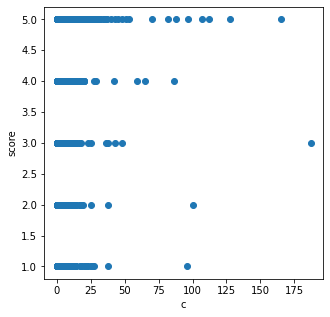

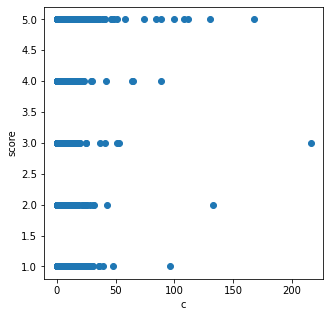

In [19]:
##---------Type the code below this line------------------##

# list of quantitative feautures
col = ['helpfulnessnumerator', 'helpfulnessdenominator']
for c in col:
  plt.figure(figsize = (5,5))
  plt.scatter(final_df[c],y)
  plt.xlabel('c')
  plt.ylabel('score')

The quantitave attributes are mostly independent of the target variable.

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [20]:
final_df.head(2)

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,prod__B00961CUXO,prod__B0096E5196,prod__B009AVDFCK,prod__B009D668KS,prod__B009HINRX8,prod__B009UOFU20,prod__B009WSNWC4,helpfulnessnumerator,helpfulnessdenominator,score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


HeatMap

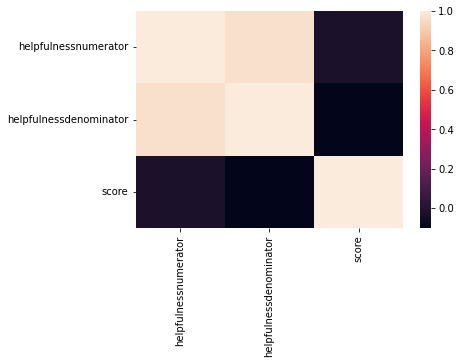

Justfication: We wanted to identify how the feautres are correlated among each other in the compact form
Observation: The dependency of score among quantitative independent variables are less. But we see
 that there are some collinearity among the independent variables


In [21]:
##---------Type the code below this line------------------##

'''
NOTE:
1. Please refer 'removing unimportant columns' cell where we removed 'id', 'user_id', 'profile_name' etc with justfication given
2. Also refer cell where we have deleted 'text' feauture with given justification
3. Plotting the plots on the base features, because of huge number of features
'''

import seaborn as sn
  
# plotting the heatmap
hm = sn.heatmap(data = df.corr()) 

# displaying the plotted heatmap
plt.show()
print('Justfication: We wanted to identify how the feautres are correlated among each other in the compact form')
print('Observation: The dependency of score among quantitative independent variables are less. But we see\n \
that there are some collinearity among the independent variables')


PairPlots

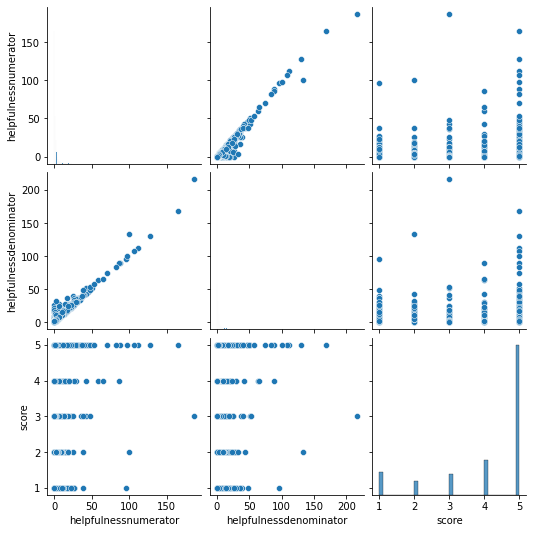

Justification: Based on the above heatmap, we saw in magnitude the correlation. But we dont know HOW arethey being correlated. So Pair Plots would be a good choice.
Pair Plots for analyzing the dependency among features


In [35]:
sn.pairplot(df)
plt.show()
print('Justification: Based on the above heatmap, \
we saw in magnitude the correlation. But we dont know HOW are\
they being correlated. So Pair Plots would be a good choice.')
print('Pair Plots for analyzing the dependency among features')

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

In [23]:
from sklearn.model_selection import train_test_split
 
# split the dataset into 90-10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

print('final_df shape:', final_df.shape)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

final_df shape: (9994, 5552)


((8994, 5551), (1000, 5551), (8994,), (1000,))

Information Gain
* It measures the reduction in uncertainty in variable A when variable B is known.
* To select variables, we are interested in the mutual information between the predictor
variables and the target. Higher mutual information values, indicate little uncertainty about
the target Y given the predictor X.
* Smaller the value of the mi, the less information we can infer from the feature about the
target

In [24]:
'''Note: This cell will take 5 min to run'''
from sklearn.feature_selection import mutual_info_classif
mi_clf = mutual_info_classif(X_train,y_train)
mi_clf

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([0.        , 0.00246003, 0.        , ..., 0.00375179, 0.        ,
       0.02393883])

Text(0, 0.5, 'Mutual Information')

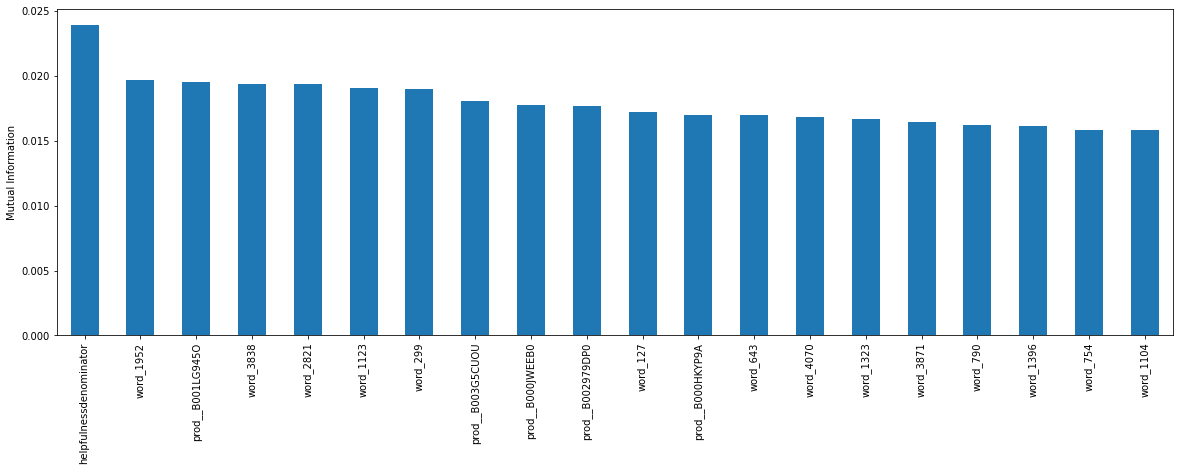

In [25]:
mi_clf = pd.Series(mi_clf)
mi_clf.index = X_train.columns
mi_clf = mi_clf.sort_values(ascending=False)
mi_clf[:20].plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [26]:
print('Top 10 Features w.r.t. Information Gain')
igf = mi_clf[:10].index
igf

Top 10 Features w.r.t. Information Gain


Index(['helpfulnessdenominator', 'word_1952', 'prod__B001LG945O', 'word_3838',
       'word_2821', 'word_1123', 'word_299', 'prod__B003G5CUOU',
       'prod__B000JWEEB0', 'prod__B002979DP0'],
      dtype='object')

Chi-Squared test
* Compute chi-squared stats between each non-negative feature and class.
* This score should be used to evaluate categorical variables in a classification task.

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Text(0, 0.5, 'Chi Square')

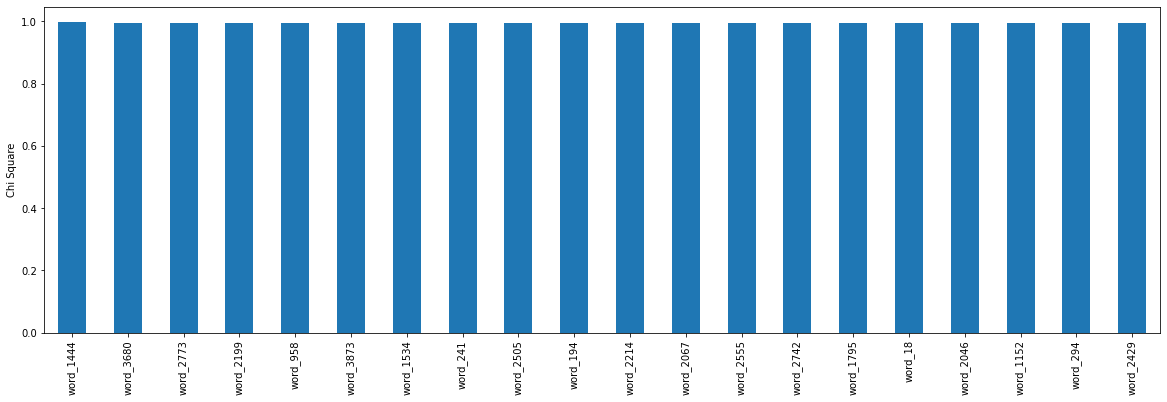

In [27]:
from sklearn.feature_selection import chi2

f_score_clf = chi2(X_train, y_train)
pvalues = pd.Series(f_score_clf[1])
pvalues.index = X_train.columns
pvalues = pvalues.sort_values(ascending=False)
pvalues[:20].plot.bar(figsize=(20, 6))
plt.ylabel('Chi Square')

In [28]:
print('Top 10 Features w.r.t. Information Gain')

csf= pvalues[:10].index
csf

Top 10 Features w.r.t. Information Gain


Index(['word_1444', 'word_3680', 'word_2773', 'word_2199', 'word_958',
       'word_3873', 'word_1534', 'word_241', 'word_2505', 'word_194'],
      dtype='object')

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

**Since the top 10 features from Information Gain and Chi-Squared are mostly dijoint sets, we decided to use the entire feature set. Becuase there are a lot of words dummies features that are useful instead of just 10. So, we are not going proceeding with either of these tests**

In [29]:
##---------Type the code below this line------------------##

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

* Implementation of Scaling of Feautures into appropriate scales.

In [30]:
from sklearn.preprocessing import MinMaxScaler
  
# scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


((8994, 5551), (1000, 5551))

## 6.1 ML technique 1 + Justification

Justification of Random Forest Classifier:
* Non-parametric: Random forest classifiers are non-parametric models, which means they do not assume any particular distribution of the data. Which is perfect for our use case of sparse dataset.

* Robustness: Random forest classifiers are robust to noise and outliers in the data.

* Feature importance: Since we have a lot of features, Random forest classifiers provide a measure of feature importance, which can be useful for feature selection and understanding the underlying relationships in the data.



In [31]:
##---------Type the code below this line------------------##

'''Selecting Random Forest Classifier and Boosting Classifier as they are good with handling 
sparse dataset and less prone overfitting'''

from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
rf_clf = RandomForestClassifier(n_estimators=100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf_clf.fit(X_train_scaled, y_train)
  
# performing predictions on the test dataset
rf_y_pred = rf_clf.predict(X_test_scaled)

## 6.2 ML technique 2 + Justification

Justification of Gradient Boosting Classifier:
* Handles imbalanced data: Since we have majority score of 5 in thed data, Gradient boosting classifiers can handle imbalanced data by assigning higher weights to the minority class samples and lower weights to the majority class samples.

* Handles non-linear relationships: Since we have wide variety of features Gradient boosting classifiers can model non-linear relationships between the features and the target variable by using decision trees as weak learners

In [32]:
##---------Type the code below this line------------------##
from sklearn.ensemble import GradientBoostingClassifier

# creating a GB classifier
gb_clf = GradientBoostingClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
gb_clf.fit(X_train_scaled, y_train)

# performing predictions on the test dataset
gb_y_pred = gb_clf.predict(X_test_scaled)

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [33]:
##---------Type the code below this line------------------##
from sklearn.metrics import classification_report

print('Random Forest Classifier')
rf_clf_report = classification_report(y_test, rf_y_pred)
print(rf_clf_report)

print('\n\nGradient Boosting Classifier')
gb_clf_report = classification_report(y_test, gb_y_pred)
print(gb_clf_report)

Random Forest Classifier
              precision    recall  f1-score   support

         1.0       0.38      0.27      0.32        86
         2.0       0.25      0.05      0.08        59
         3.0       0.48      0.11      0.18        93
         4.0       0.31      0.07      0.12       137
         5.0       0.67      0.94      0.78       625

    accuracy                           0.63      1000
   macro avg       0.42      0.29      0.29      1000
weighted avg       0.55      0.63      0.55      1000



Gradient Boosting Classifier
              precision    recall  f1-score   support

         1.0       0.39      0.15      0.22        86
         2.0       0.50      0.03      0.06        59
         3.0       0.43      0.03      0.06        93
         4.0       0.45      0.07      0.13       137
         5.0       0.65      0.98      0.78       625

    accuracy                           0.64      1000
   macro avg       0.49      0.25      0.25      1000
weighted avg       0.

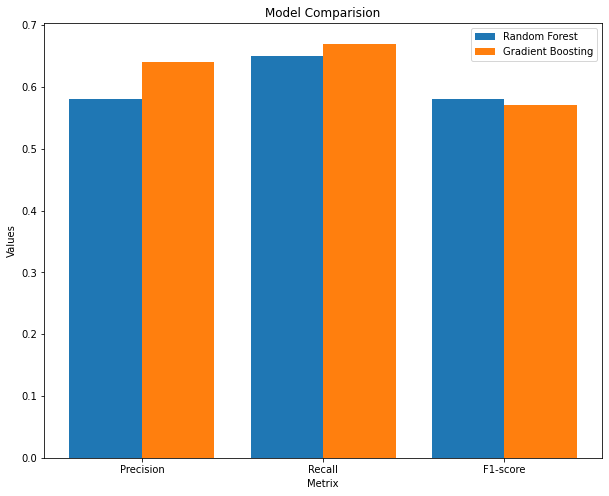

In [34]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,8))
X = ['Precision','Recall', 'F1-score']
rf_val = [0.58, 0.65, 0.58]
gb_val = [0.64, 0.67, 0.57]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, rf_val, 0.4, label = 'Random Forest')
plt.bar(X_axis + 0.2, gb_val, 0.4, label = 'Gradient Boosting')
  
plt.xticks(X_axis, X)
plt.xlabel("Metrix")
plt.ylabel("Values")
plt.title("Model Comparision")
plt.legend()



* Although both the models has performed equally but Precision and Recall of **Gradient Boosting** are more w.r.t. Random Forest:

* If we consider the F1 score (which is the weighted average of precision and recall), then Random Forest is performing very slightly better than Gradient Boosting.

* Gradient Boosting will be our final selected model. 

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

To solve the problem, the solution proposed is to implement Gradient Boosting Algorithm. Thus, the gap between source data and customer satisfaction analysis to the end user can be reduced.

Learnings/Challenges/Decision Made:

* The dataset size was very large initially contained lakhs of rows. In order to reduce the processing time, a good sample of data has been taken.

* Due to the sparse and imbalance nature of the dataset, we cannot implement any classification algorithm. So, we had to choose wisely among them.

* We made a tough decision to remove time and profile_name feaures, because of the fact that we wanted the ratings to be independent of time and user. There is a chance that a particular user might be active for certain period and then he became inactive. We wanted to avoid these kind of situations.

* In order to optimize the sparse matrix length, we have considered 'summary' column instead of 'text' feature. Becasue 'text' feautre will bring more words to the corpus. Creating more length of vectors. 

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!